## Plot the images for Paper

In [2]:
from tensorboard.backend.event_processing import event_accumulator, event_multiplexer
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from typing import List
import math
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd

os.chdir('../')
sys.path.append('./')
os.getcwd()

'/home/best/GeNet'

### Train step

In [2]:
# log_dir = './out/logs'
# parsers = ['train', 'val', 'test']
# tags = ['_acc', '_loss']
# dataset_names = ['cifar10', 'mnist']
# ea = event_multiplexer.EventMultiplexer().AddRunsFromDirectory(log_dir)
# ea.Reload()
# ea.Scalars('GAT_CIFAR10_03h57m06s_on_Mar_15_2024_PC', 'train/_acc')
# for dataset_name in dataset_names:
#     for parser in parsers:
#         if parser == 'test':
#             tags = ['_acc']
#         else:
#             tags = ['_acc', '_loss']
                    
#         for tag in tags:
#             f = plt.figure('dataset_names' + '_' + parser + '_' + tag, figsize=(10, 5))
#             for run in ea.Runs().keys():
#                 if dataset_name.upper() in run:
#                     sc = ea.Scalars(run, parser + '/' + tag)
#                     plt.plot([s.step for s in sc], [s.value for s in sc])
#             plt.show()
        

In [3]:
out_dir = './demo/plot_visualization/'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

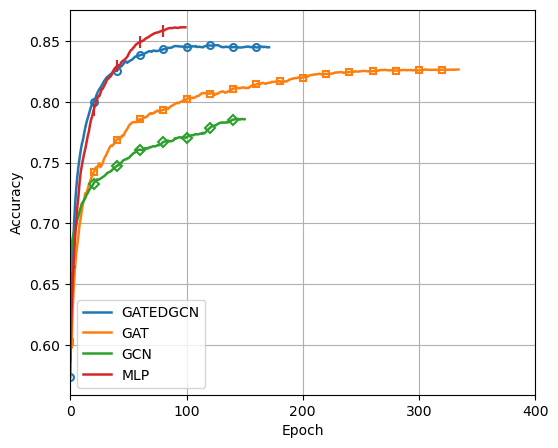

In [12]:

dataset_name = 'cifar10'
dataset_name = 'fashionmnist'
# dataset_name = 'mnist'
log_dir = './out/logs'
parser = 'val'
tag = '_acc'
ea = event_multiplexer.EventMultiplexer().AddRunsFromDirectory(log_dir)
ea.Reload()
plt.figure(figsize=(6,5))
markers = ['o', 's', 'D', '|']
index = 0
for run in sorted(ea.Runs().keys()):
    if dataset_name.upper() in run.split('_'):
        sc = ea.Scalars(run, parser + '/' + tag)
        df = pd.Series(data=[s.value for s in sc], index=[s.step for s in sc])
        smooth = df.ewm(alpha= 1 - 0.9).mean()
        model_name = run.split('_')[0]
        
        
        line = plt.plot([s for s in smooth.index], [s for s in smooth.values], label=model_name, linewidth=1.8)
        plt.plot([s for s in smooth.index][::20], [s for s in smooth.values][::20], linestyle = 'None',
                marker = markers[index], color = line[0].get_color(), markerfacecolor = 'None', markersize = 8 if markers[index]=='|' else 5, markeredgewidth = 1.5)
        index += 1
        
   
        
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
if tag == '_loss':
    plt.ylabel('Loss')
# if parser == 'train':
#     plt.title('Train Loss in ' + dataset_name.upper())
# else:
#     plt.title('Validation Accuracy in ' + dataset_name.upper())
plt.xticks(np.linspace(0, 400, 5))
plt.xlim(0, 400)
plt.grid()
plt.savefig(out_dir + dataset_name + '_' + parser  + tag + '.pdf', pad_inches=0, bbox_inches='tight')
plt.show()

### Test step with SNR


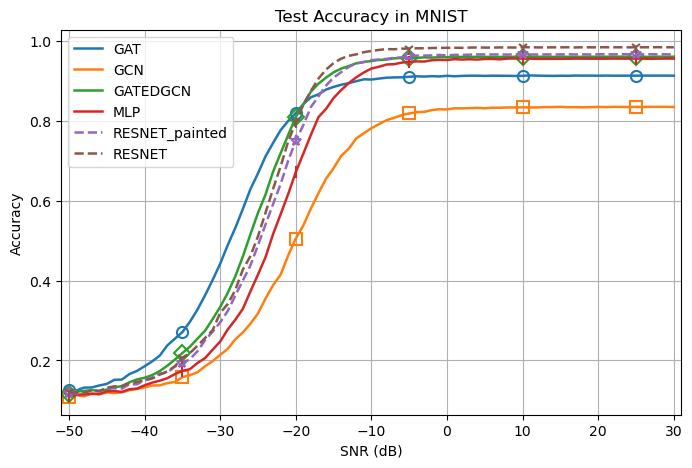

In [3]:
dataset_name = 'cifar10'
dataset_name = 'mnist'
log_dir = './out/eval/'
parser = 'test_acc'
tag = 'snr'
ea = event_multiplexer.EventMultiplexer().AddRunsFromDirectory(log_dir + tag)
ea.Reload()
markers = ['o', 's', 'D', '|', '*', '1']
index = 0
plt.figure(figsize=(8,5))
for run in sorted(ea.Runs().keys()):
    if dataset_name in run:
        sc = ea.Scalars(run, parser + '/' + tag)
        df = pd.Series(data=[s.value for s in sc], index=[s.step for s in sc])
        smooth = df.ewm(alpha= 1 - 0.2).mean()
        model_name = run.split('_')[0]
        is_painted = eval(run.split('_')[-1])
        if model_name == 'resnet' and is_painted:
            line = plt.plot([s for s in smooth.index], [s for s in smooth.values], label=model_name.upper() + '_painted', linewidth=1.8, linestyle='--')
        elif model_name == 'resnet' and not is_painted:
            line = plt.plot([s for s in smooth.index], [s for s in smooth.values], label=model_name.upper(), linewidth=1.8, linestyle='--')
        else:
            line = plt.plot([s for s in smooth.index], [s for s in smooth.values], label=model_name.upper(),linewidth=1.8)
            
        plt.plot([s for s in smooth.index][::15], [s for s in smooth.values][::15], linestyle = 'None',
                marker = markers[index], color = line[0].get_color(), markerfacecolor = 'None', markersize=8, markeredgewidth = 1.5)
        index += 1
plt.legend()        




        

plt.xlabel('SNR (dB)') 
plt.ylabel('Accuracy')
plt.title('Test Accuracy in ' + dataset_name.upper())
plt.xlim(-51, 31)
plt.grid()
plt.savefig(out_dir + dataset_name + '_'  + tag + '.pdf', pad_inches=0, bbox_inches='tight')
plt.show()

### Test step with n_sp

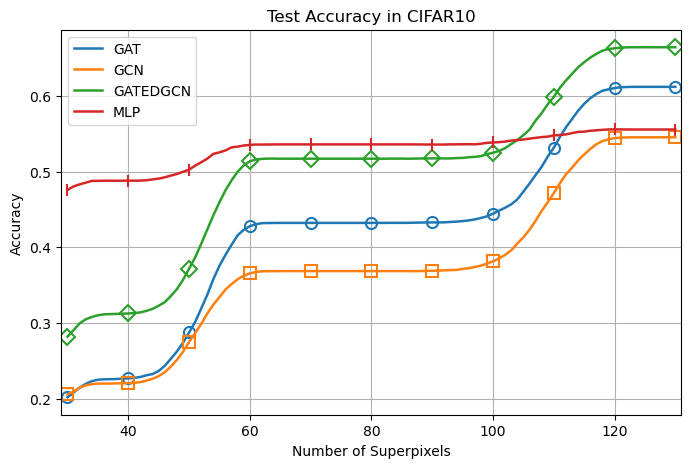

In [6]:
dataset_name = 'cifar10'
# dataset_name = 'mnist'
log_dir = './out/eval/'
parser = 'test_acc'
tag = 'n_sp'
ea = event_multiplexer.EventMultiplexer().AddRunsFromDirectory(log_dir + tag)
ea.Reload()
markers = ['o', 's', 'D', '|', '*', '1']
index = 0
plt.figure(figsize=(8,5))
for run in sorted(ea.Runs().keys()):
    if dataset_name in run:
        sc = ea.Scalars(run, parser + '/' + tag)
        df = pd.Series(data=[s.value for s in sc], index=[s.step for s in sc])
        smooth = df.ewm(alpha= 1 - 0.2).mean()
        model_name = run.split('_')[0]
        is_painted = eval(run.split('_')[-1])
        if model_name == 'resnet' and is_painted:
            line = plt.plot([s for s in smooth.index], [s for s in smooth.values], label=model_name.upper() + '_painted', linewidth=1.8, linestyle='--')
        elif model_name == 'resnet' and not is_painted:
            line = plt.plot([s for s in smooth.index], [s for s in smooth.values], label=model_name.upper(), linewidth=1.8, linestyle='--')
        else:
            line = plt.plot([s for s in smooth.index], [s for s in smooth.values], label=model_name.upper(),linewidth=1.8)
            
        plt.plot([s for s in smooth.index][::10], [s for s in smooth.values][::10], linestyle = 'None',
                marker = markers[index], color = line[0].get_color(), markerfacecolor = 'None', markersize=8, markeredgewidth = 1.5)
        index += 1
plt.legend()        




        

plt.xlabel('Number of Superpixels') 
plt.ylabel('Accuracy')
plt.title('Test Accuracy in ' + dataset_name.upper())
if dataset_name == 'mnist':
    plt.xlim(19, 91)
else:
    
    plt.xlim(29, 131)
plt.grid()
plt.savefig(out_dir + dataset_name + '_'  + tag + '.pdf', pad_inches=0, bbox_inches='tight')
plt.show()

### Test step with Rotation

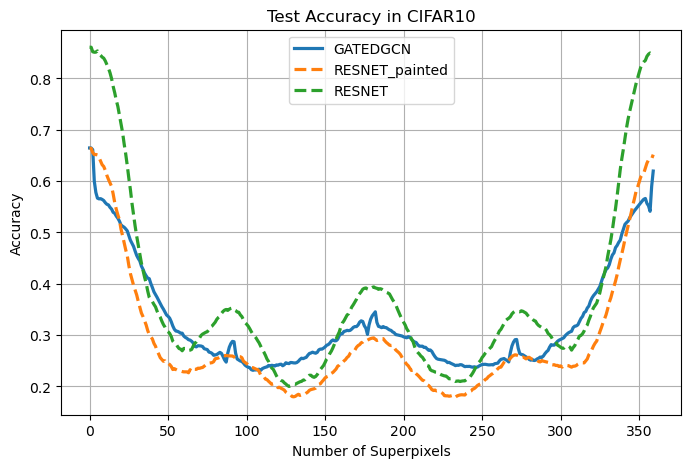

In [15]:
dataset_name = 'cifar10'
# dataset_name = 'mnist'
log_dir = './out/eval/'
parser = 'test_acc'
tag = 'rotation'
ea = event_multiplexer.EventMultiplexer().AddRunsFromDirectory(log_dir + tag)
ea.Reload()
markers = ['o', 's', 'D', '|', '*', '1']
index = 0
plt.figure(figsize=(8,5))
for run in sorted(ea.Runs().keys()):
    if dataset_name in run:
        sc = ea.Scalars(run, parser + '/' + tag)
        df = pd.Series(data=[s.value for s in sc], index=[s.step for s in sc])
        smooth = df.ewm(alpha= 1 - 0.6).mean()
        model_name = run.split('_')[0]
        is_painted = eval(run.split('_')[-1])
        if model_name == 'resnet' and is_painted:
            line = plt.plot([s for s in smooth.index], [s for s in smooth.values], label=model_name.upper() + '_painted', linewidth=2.3, linestyle='--')
        elif model_name == 'resnet' and not is_painted:
            line = plt.plot([s for s in smooth.index], [s for s in smooth.values], label=model_name.upper(), linewidth=2.3, linestyle='--')
        else:
            line = plt.plot([s for s in smooth.index], [s for s in smooth.values], label=model_name.upper(),linewidth=2.3)
            
        # plt.plot([s for s in smooth.index][::10], [s for s in smooth.values][::10], linestyle = 'None',
        #         marker = markers[index], color = line[0].get_color(), markerfacecolor = 'None', markersize=8, markeredgewidth = 1.5)
        index += 1
plt.legend()        




        

plt.xlabel('Number of Superpixels') 
plt.ylabel('Accuracy')
plt.title('Test Accuracy in ' + dataset_name.upper())

plt.grid()
plt.savefig(out_dir + dataset_name + '_'  + tag + '.pdf', pad_inches=0, bbox_inches='tight')
plt.show()